In [2]:
import altair as alt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\BGaither\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

**Goal:**  
We want to develop a model that will predict crime volume for different NYC Borough locations for different times of day around the year. 

In [3]:
#load csv
file_path = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab 2\\Data\\Training_and_Test_Set.csv"
#load Data into Pandas
df_Crime = pd.read_csv(file_path)

In [4]:
df_Crime.head(5)

,CMPLNT_FR_DT,Daytime,Day_Name,Month,Day,Year,Season,GeoCell,BORO_NM,PRCP,...,TMIN,TMAX,Population,PC_INCOME,Hm_Sls_Price_Range,Holiday,Event,is_Holiday,is_Event,count_cmplnt
0,11/26/2014,Morning,Wednesday,November,26.0,2014.0,Fall,66.0,QUEENS,1.24,...,34,51,"2,250,002",40997,Medium,NaN,NaN,0,0,1
1,12/1/2014,Late Night,Monday,December,1.0,2014.0,Winter,60.0,QUEENS,0.09,...,42,65,"2,250,002",40997,Medium,NaN,NaN,0,0,1
2,11/10/2015,Morning,Tuesday,November,10.0,2015.0,Fall,15.0,BROOKLYN,0.26,...,51,57,"2,552,911",43915,High,NaN,NaN,0,0,2
3,2/4/2014,Morning,Tuesday,February,4.0,2014.0,Winter,48.0,QUEENS,0.00,...,22,35,"2,250,002",40997,Medium,NaN,NaN,0,0,3
4,8/25/2015,Late Night,Tuesday,August,25.0,2015.0,Summer,35.0,BROOKLYN,0.00,...,73,90,"2,552,911",43915,High,NaN,NaN,0,0,1


In [5]:
df_Crime.shape

(170650, 21)

In [6]:
len(df_Crime) - df_Crime.count()

CMPLNT_FR_DT               0
Daytime                    0
Day_Name                   0
Month                      0
Day                        0
Year                       0
Season                     0
GeoCell                    0
BORO_NM                    0
PRCP                       0
SNOW                       0
TMIN                       0
TMAX                       0
Population                 0
PC_INCOME                  0
Hm_Sls_Price_Range         0
Holiday               166062
Event                 144780
is_Holiday                 0
is_Event                   0
count_cmplnt               0
dtype: int64

In [7]:
#since the only NANs are in Holiday and Event, we'll replace those NaNs with 'None'
df_Crime = df_Crime.fillna('None')

In [8]:
len(df_Crime) - df_Crime.count()

CMPLNT_FR_DT          0
Daytime               0
Day_Name              0
Month                 0
Day                   0
Year                  0
Season                0
GeoCell               0
BORO_NM               0
PRCP                  0
SNOW                  0
TMIN                  0
TMAX                  0
Population            0
PC_INCOME             0
Hm_Sls_Price_Range    0
Holiday               0
Event                 0
is_Holiday            0
is_Event              0
count_cmplnt          0
dtype: int64

In [9]:
for col in df_Crime.columns:
    print(col)

CMPLNT_FR_DT
Daytime
Day_Name
Month
Day
Year
Season
GeoCell
BORO_NM
PRCP
SNOW
TMIN
TMAX
Population
PC_INCOME
Hm_Sls_Price_Range
Holiday
Event
is_Holiday
is_Event
count_cmplnt


### Data preprocessing 1

For initial model development and feature analysis, the features were reduced down to a subset that sought to avoid data leakage and maximize liklihood of importance based on whether or not the value changed daily.  We dropped features such as population, income and home sales prices as they were annual figures so didn't change on a daily basis, thus do not have discriminatory power.

We chose to one hot encode the categorical features and scale the continuous variables.

One Hot encoded features:
- Daytime
- Day_Name
- Month
- Season
- BORO_NM
- Holiday
- Event

Scaled features:
- PRCP
- SNOW
- TMIN
- TMAX

Features left unchanged:
- is_Holiday
- is_Event
- Day
- Year
- GeoCell

These features were used for initial model development.  In Data Preparation Part 2, we detail which are the final features selected based in Gini-Importance along with their meaning.

In [10]:
#drop population, PC_Income and Hm_Sls_Price_Range as they do not vary daily
#drop cmplnt_fr_dt as that is captured by month, day, and year
df_Crime = df_Crime[['Daytime','Day_Name','Month','Day','Year','Season','GeoCell','BORO_NM','PRCP','SNOW','TMIN','TMAX','Holiday','Event','is_Holiday','is_Event','count_cmplnt']]

In [11]:
X = df_Crime[['Daytime','Day_Name','Month','Day','Year','Season','GeoCell','BORO_NM','PRCP','SNOW','TMIN','TMAX','Holiday','Event','is_Holiday','is_Event']]
y = df_Crime[['count_cmplnt']]

In [12]:
#one hot encode the categorical features
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['Daytime','Day_Name','Month','Season','BORO_NM','Holiday','Event']
columns_no_change = ['is_Holiday','is_Event','Day','Year','GeoCell','PRCP','SNOW','TMIN','TMAX']

df_existing = X[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(X[columns_to_encode])

#concatenate processed columns back together for X
X = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(X)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
X = df1


In [13]:
#scale specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#go ahead and split the data so we can scale data separately on training and then on test so we don't have leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

columns_to_scale = ['PRCP','SNOW','TMIN','TMAX']
#get a list of all columns without the columns to scale above
lstCols = X.columns.values.tolist()
lstCols.remove('PRCP')
lstCols.remove('SNOW')
lstCols.remove('TMIN')
lstCols.remove('TMAX')
columns_no_change = lstCols

df_existing = X_train[columns_no_change]
existing_cols = df_existing.to_numpy()

#scaler
scaler = StandardScaler()

#scale and encode separate columns
scaled_columns = scaler.fit_transform(X_train[columns_to_scale])

#concatenate processed columns back together for X_train
X_train_np = np.concatenate([scaled_columns,existing_cols],axis=1)

df_existing = X_test[columns_no_change]
existing_cols = df_existing.to_numpy()

#separately scale X_test
scaled_columns = scaler.transform(X_test[columns_to_scale]) #use the fit scaler object from X_train to scale X_test

X_test_np = np.concatenate([scaled_columns,existing_cols],axis=1)

In [14]:
#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_train_np)
#get the column names back to the dataframe
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_train = df1

#convert the numpy array back to a pandas dataframe for X_test
df1 = pd.DataFrame(X_test_np)
#get the column names back to the dataframe
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_test = df1

In [15]:
X_train.head(5)

,PRCP,SNOW,TMIN,TMAX,x0_Day,x0_Early Morning,x0_Evening,x0_Late Night,x0_Morning,x0_Night,...,x6_SoHo Festival,x6_St Patricks Day Parade,x6_Thanksgiving Day Parade,x6_US Open Tennis,x6_Westminster Kennel Club Dog Show,is_Holiday,is_Event,Day,Year,GeoCell
0,0.087801,1.665900,-1.276171,-1.287526,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,2014.0,78.0
1,-0.350542,-0.154153,0.781596,0.698004,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,2014.0,78.0
2,-0.350542,-0.154153,-0.219480,0.123245,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2014.0,98.0
3,-0.323145,-0.154153,1.059673,1.011509,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2015.0,87.0
4,-0.049181,-0.154153,1.282134,1.011509,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,2015.0,25.0


In [16]:
X_test.head(5)

,PRCP,SNOW,TMIN,TMAX,x0_Day,x0_Early Morning,x0_Evening,x0_Late Night,x0_Morning,x0_Night,...,x6_SoHo Festival,x6_St Patricks Day Parade,x6_Thanksgiving Day Parade,x6_US Open Tennis,x6_Westminster Kennel Club Dog Show,is_Holiday,is_Event,Day,Year,GeoCell
0,-0.240956,-0.032816,-1.776709,-1.653282,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2014.0,37.0
1,-0.213560,-0.154153,-0.052634,0.227747,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,2015.0,36.0
2,-0.350542,-0.154153,1.282134,1.325013,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2015.0,66.0
3,-0.350542,-0.154153,1.282134,1.325013,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2015.0,29.0
4,0.306972,-0.154153,0.559135,0.175496,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,2014.0,48.0


In [17]:
y_train[['count_cmplnt']].describe()

,count_cmplnt
count,136520.000000
mean,4.711742
std,5.144352
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,132.000000


In [20]:
%time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#create regressor object
reg = RandomForestRegressor(n_estimators = 50, random_state = 0)

#5 fold cross validation
%time cv_results = cross_val_score(reg, X_train, y_train.values.ravel(), cv=5, scoring='neg_mean_absolute_error')
print('Cross Validation Results: {}'.format(cv_results))

Wall time: 0 ns
Wall time: 3min 56s
Cross Validation Results: [-1.65603575 -1.64081234 -1.63430779 -1.637207   -1.6277864 ]


In [19]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 50, random_state = 0)
%time reg.fit(X_train,y_train.values.ravel())
y_pred = reg.predict(X_test)

Wall time: 1min 2s


<AxesSubplot:>

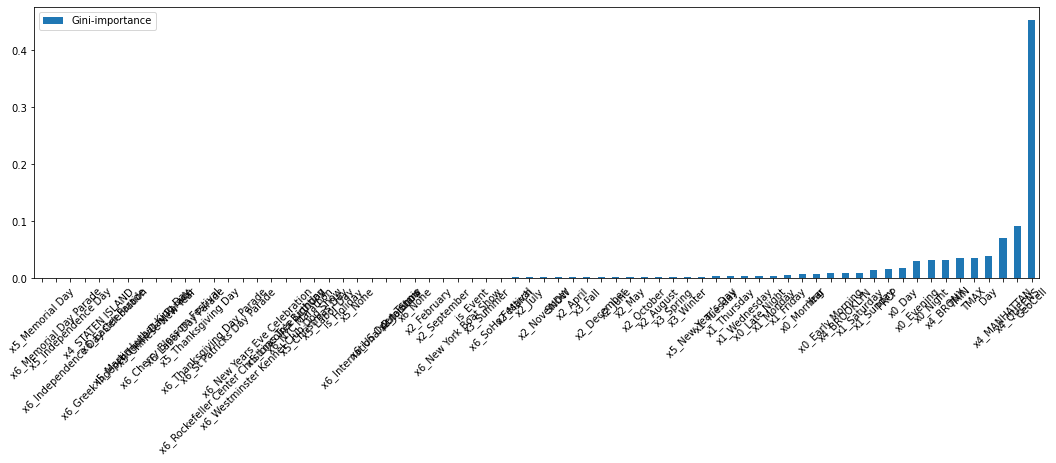

In [20]:
#get feature importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, reg.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    #print('{}, Score: %.5f'.format(feature) %(importance))

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(figsize=(18,5),kind='bar', rot=45)

In [21]:
df_top_features = importances[importances['Gini-importance']>.004]
df_top_features['feature'] = df_top_features.index
top_features = df_top_features['feature'].tolist()

df_top_features.sort_values(by='Gini-importance',ascending=False)

C:\Users\BGaither\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gini-importance,feature
GeoCell,0.453479,GeoCell
x4_QUEENS,0.092685,x4_QUEENS
x4_MANHATTAN,0.070824,x4_MANHATTAN
Day,0.039940,Day
TMAX,0.036671,TMAX
TMIN,0.035702,TMIN
x4_BRONX,0.033021,x4_BRONX
x0_Night,0.032610,x0_Night
x0_Evening,0.030263,x0_Evening
x0_Day,0.019059,x0_Day


### Data Preparation Part 2
Describe the final dataset that is used for regression:

After fitting a preliminary Random Forest Regression model, we've identified the top performing features using the Gini-importances with a threshold of >.004 which selects 22 features to feed into the model.

**Inputs to the model would be:**

The following features are scaled:
- PRCP: amount of rainfall for the day
- TMIN: minimum temp for the day
- TMAX: maximum temp for the day

The following features are one hot encoded:
- Daytime:  time period of the day (Early Morning, Morning, Day, Afternoon, Evening, etc...)
- Month: the month for which you would like to predict crime volume
- Day_Name:  Day of the week (Monday, Tuesday, Wednesday, ect...)
- BORO_NM: Name of the borough you would like to predict crime volume

The following features are left unchanged:
- Day: the day of the month in numerical format
- Year: the year in numerical format YYYY
- GeoCell: We would need to perform feature transformation taking inputs x_coordinate and y_coordinate to calculate the GeoCell and then pass GeoCell value to the model.  This allows us to use geolocation details in a more abstract way to avoid overfitting to an exact location.

In [22]:
#columns to keep based on feature importance
X_train=X_train[top_features]

X_test = X_test[top_features]

## Grid Search

In [25]:
#Set up the parameters for grid search
parameters = {'n_estimators' : (30,50,70,90),
              'criterion' : ('mse','mae'),
              'max_depth' : (5,7,9,10),
              'max_features' : ('auto','sqrt'),
              'min_samples_split' : (2,4,6)
             }

In [69]:
#since grid search is taking a long time with full training data, we'll subsample 
y_train.reset_index(drop=True,inplace=True)
df = pd.concat([X_train,y_train], axis=1)
len(df) - df.count()

PRCP                0
TMIN                0
TMAX                0
x0_Day              0
x0_Early Morning    0
x0_Evening          0
x0_Late Night       0
x0_Morning          0
x0_Night            0
x1_Friday           0
x1_Monday           0
x1_Saturday         0
x1_Sunday           0
x1_Thursday         0
x1_Wednesday        0
x4_BRONX            0
x4_BROOKLYN         0
x4_MANHATTAN        0
x4_QUEENS           0
Day                 0
Year                0
GeoCell             0
count_cmplnt        0
dtype: int64

In [70]:
df_ds = df.sample(frac=.5,replace=True,random_state=1)
lstCols = df_ds.columns.values.tolist()
lstCols.remove('count_cmplnt')
X_ds_train = df_ds[lstCols]
y_ds_train = df_ds[['count_cmplnt']]

In [71]:
#compare fit time with smaller data
%time reg.fit(X_ds_train,y_ds_train.values.ravel())

Wall time: 11.7 s


RandomForestRegressor(n_estimators=50, random_state=0)

In [72]:
reg_grid = GridSearchCV(RandomForestRegressor(n_jobs=-1,oob_score=False),param_grid=parameters,cv=3,verbose=True)
%time reg_grid_model = reg_grid.fit(X_ds_train,y_ds_train.values.ravel())

In [ ]:
%time reg_grid_model = reg_grid.fit(X_ds_train,y_ds_train.values.ravel())

In [ ]:
reg_grid_model.best_estimator_

## Results of the Grid Search

Time taken:  4h 30min using SageMaker ml.c5.9xlarge

<b> Best Estimator: </b>

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
                      
                      
<b> Best Score (MAE)</b>

0.7295567982206977

## Implement Best Model

In [23]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(bootstrap=True, 
                            ccp_alpha=0.0, 
                            criterion='mae',
                            max_depth=10, 
                            max_features='auto', 
                            max_leaf_nodes=None,
                            max_samples=None, 
                            min_impurity_decrease=0.0,
                            min_impurity_split=None, 
                            min_samples_leaf=1,
                            min_samples_split=2, 
                            min_weight_fraction_leaf=0.0,
                            n_estimators=50, 
                            n_jobs=-1, 
                            oob_score=False,
                            random_state=None, 
                            verbose=0, 
                            warm_start=False)
%time reg.fit(X_train,y_train.values.ravel())

Wall time: 1h 5min 23s


RandomForestRegressor(criterion='mae', max_depth=10, n_estimators=50, n_jobs=-1)

In [24]:
y_pred = reg.predict(X_test)

### Modeling and Evaluation 4

Here we can see the Mean Absolute Error and the R<sup>2</sup> against the test set

In [93]:
from sklearn.metrics import *

#print out the mean absolute error (mae)
print('Mean Absolute Error:', mean_absolute_error(y_test,y_pred),'crimes per period')
print('Root Mean Squared Error:', mean_squared_error(y_test,y_pred, squared=False),'crimes per period')
print('r2:',r2_score(y_test,y_pred))

Mean Absolute Error: 1.7504608848520362 crimes per period
Root Mean Squared Error: 2.770257865342545 crimes per period
r2: 0.7075678909976164


### Save model to file

In [31]:
import pickle
#save the model to disk to prevent having to retrain
filename = 'RF_Regressor_HyperOpt_v1.sav'
pickle.dump(reg, open(filename,'wb'))

### Open load model from file

In [ ]:
import pickle
#load model from file
filename = 'RF_Regressor_HyperOpt_v1.sav'
reg = pickle.load(open(filename, 'rb'))

## Feature Importance of Final Model

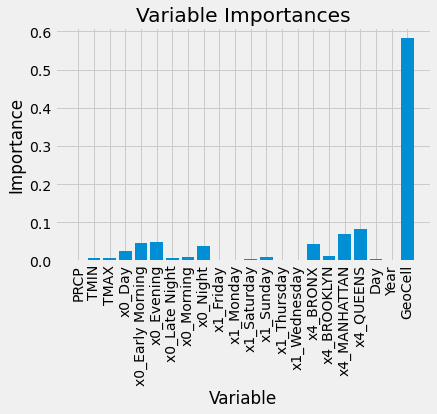

In [32]:
importances = list(reg.feature_importances_)
feature_list = X_train.columns.values.tolist()

%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [39]:
y_test.reset_index(drop=True,inplace=True)
df_testWithPreds = pd.concat([X_test,y_test],axis=1)
df_testWithPreds["prediction"] = reg.predict(X_test)

In [40]:
df_testWithPreds.head(5)

,PRCP,TMIN,TMAX,x0_Day,x0_Early Morning,x0_Evening,x0_Late Night,x0_Morning,x0_Night,x1_Friday,...,x1_Wednesday,x4_BRONX,x4_BROOKLYN,x4_MANHATTAN,x4_QUEENS,Day,Year,GeoCell,count_cmplnt,prediction
0,-0.240956,-1.776709,-1.653282,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,2014.0,37.0,9,9.16
1,-0.213560,-0.052634,0.227747,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,25.0,2015.0,36.0,12,4.88
2,-0.350542,1.282134,1.325013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,12.0,2015.0,66.0,7,9.82
3,-0.350542,1.282134,1.325013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,12.0,2015.0,29.0,1,1.04
4,0.306972,0.559135,0.175496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,22.0,2014.0,48.0,5,5.36


Text(0.5, 1.0, 'Actual and Predicted Values against Test Set')

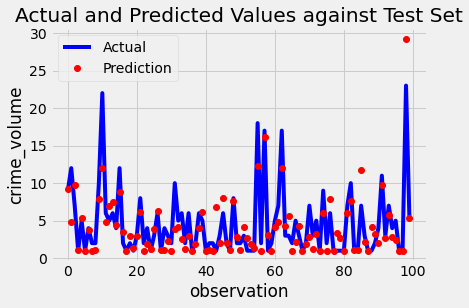

In [83]:
plt.plot(df_testWithPreds['count_cmplnt'].head(100),'b-',label='Actual')
plt.plot(df_testWithPreds['prediction'].head(100),'ro',label='Prediction')
plt.legend()
plt.xlabel('observation'); plt.ylabel('crime_volume'); plt.title('Actual and Predicted Values against Test Set')

In [49]:
df_testWithPreds['PredLessActual'] = df_testWithPreds['prediction']-df_testWithPreds['count_cmplnt']

In [50]:
df_testWithPreds.head(5)

,PRCP,TMIN,TMAX,x0_Day,x0_Early Morning,x0_Evening,x0_Late Night,x0_Morning,x0_Night,x1_Friday,...,x4_BRONX,x4_BROOKLYN,x4_MANHATTAN,x4_QUEENS,Day,Year,GeoCell,count_cmplnt,prediction,PredLessActual
0,-0.240956,-1.776709,-1.653282,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,3.0,2014.0,37.0,9,9.16,0.16
1,-0.213560,-0.052634,0.227747,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,25.0,2015.0,36.0,12,4.88,-7.12
2,-0.350542,1.282134,1.325013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,12.0,2015.0,66.0,7,9.82,2.82
3,-0.350542,1.282134,1.325013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,12.0,2015.0,29.0,1,1.04,0.04
4,0.306972,0.559135,0.175496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,22.0,2014.0,48.0,5,5.36,0.36


{'whiskers': [<matplotlib.lines.Line2D at 0x2080b823fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2080b82bbc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2080b81d7c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2080b82b948>],
 'fliers': [<matplotlib.lines.Line2D at 0x2080b835e88>],
 'means': []}

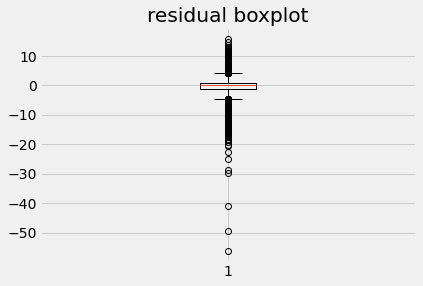

In [51]:
fig1, ax1 = plt.subplots()
ax1.set_title('residual boxplot')
ax1.boxplot(df_testWithPreds['PredLessActual'])

### Run model against holdout data

We have created a holdout set so that we can compare various regression models against the same dataset.  Below, we'll load the data and run inference using the trained model. 

We'll first need to perform the same preprocessing to the holdout set that was done for the train and test set above.

In [61]:
#load csv
file_path = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab 2\\Data\\Hold_Out_Set.csv"
#load Data into Pandas
df_Holdout = pd.read_csv(file_path)

In [64]:
#check for NaNs
len(df_Holdout) - df_Holdout.count()

CMPLNT_FR_DT              0
Daytime                   0
Day_Name                  0
Month                     0
Day                       0
Year                      0
Season                    0
GeoCell                   0
BORO_NM                   0
PRCP                      0
SNOW                      0
TMIN                      0
TMAX                      0
Population                0
PC_INCOME                 0
Hm_Sls_Price_Range        0
Holiday               18446
Event                 16064
is_Holiday                0
is_Event                  0
count_cmplnt              0
dtype: int64

In [65]:
#since the only NANs are in Holiday and Event, we'll replace those NaNs with 'None' as we did in the train and test set
df_Holdout = df_Holdout.fillna('None')

In [66]:
#check for NaNs again to verify we've taken care of them all
len(df_Holdout) - df_Holdout.count()

CMPLNT_FR_DT          0
Daytime               0
Day_Name              0
Month                 0
Day                   0
Year                  0
Season                0
GeoCell               0
BORO_NM               0
PRCP                  0
SNOW                  0
TMIN                  0
TMAX                  0
Population            0
PC_INCOME             0
Hm_Sls_Price_Range    0
Holiday               0
Event                 0
is_Holiday            0
is_Event              0
count_cmplnt          0
dtype: int64

In [67]:
#grab the candidate variables we want to preprocess by one hot encoding and scaling as we did with the train and test sets
X_holdout = df_Holdout[['Daytime','Day_Name','Month','Day','Year','Season','GeoCell','BORO_NM','PRCP','SNOW','TMIN','TMAX','Holiday','Event','is_Holiday','is_Event']]
y_holdout = df_Holdout[['count_cmplnt']]

In [68]:
#one hot encode the categorical features
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['Daytime','Day_Name','Month','Season','BORO_NM','Holiday','Event']
columns_no_change = ['is_Holiday','is_Event','Day','Year','GeoCell','PRCP','SNOW','TMIN','TMAX']

df_existing = X_holdout[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(X_holdout[columns_to_encode])

#concatenate processed columns back together for X
X_holdout = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(X_holdout)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
X_holdout = df1

In [69]:
#scale specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_scale = ['PRCP','SNOW','TMIN','TMAX']
#get a list of all columns without the columns to scale above
lstCols = X_holdout.columns.values.tolist()
lstCols.remove('PRCP')
lstCols.remove('SNOW')
lstCols.remove('TMIN')
lstCols.remove('TMAX')
columns_no_change = lstCols

df_existing = X_holdout[columns_no_change]
existing_cols = df_existing.to_numpy()

#separately scale X_holdout
scaled_columns = scaler.transform(X_holdout[columns_to_scale]) #use the fit scaler object from X_train to scale X_holdout

X_holdout_np = np.concatenate([scaled_columns,existing_cols],axis=1)

In [70]:
#convert the numpy array back to a pandas dataframe for X_holdout
df1 = pd.DataFrame(X_holdout_np)
#get the column names back to the dataframe
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
X_holdout = df1

In [77]:
#get our x and y variables set to the appropriate columns
y_holdout = df_Holdout[['count_cmplnt']]
X_holdout = X_holdout[top_features]


In [78]:
#verify our columns in the x are as we expect
X_holdout.columns

Index(['PRCP', 'TMIN', 'TMAX', 'x0_Day', 'x0_Early Morning', 'x0_Evening',
       'x0_Late Night', 'x0_Morning', 'x0_Night', 'x1_Friday', 'x1_Monday',
       'x1_Saturday', 'x1_Sunday', 'x1_Thursday', 'x1_Wednesday', 'x4_BRONX',
       'x4_BROOKLYN', 'x4_MANHATTAN', 'x4_QUEENS', 'Day', 'Year', 'GeoCell'],
      dtype='object')

In [79]:
#run inference against the holdout set
y_pred_holdout = reg.predict(X_holdout)

Now, let's check the 

### Model Evaluation 4 Continued

Here we can see the Mean Absolute Error and the r<sup>2</sup> against the holdout set for the random forest regression model.  We can see that on average, we are predicting crimes with an error of 1.74 crimes per period.  Period here means per time of day (for a given day in the morning, evening, night, etc...)

In [92]:
from sklearn.metrics import *

#print out the mean absolute error (mae)
print('Mean Absolute Error:', mean_absolute_error(y_holdout,y_pred_holdout),'crimes per period')
print('Root Mean Squared Error:', mean_squared_error(y_holdout,y_pred_holdout, squared=False),'crimes per period')
print('r2:',r2_score(y_holdout,y_pred_holdout))

Mean Absolute Error: 1.7447178567661636 crimes per period
Root Mean Squared Error: 2.721773360654654 crimes per period
r2: 0.7138778143673601


In [81]:
y_holdout.reset_index(drop=True,inplace=True)
df_holdoutWithPreds = pd.concat([X_holdout,y_holdout],axis=1)
df_holdoutWithPreds["prediction"] = reg.predict(X_holdout)

Here we plot out the top 100 records of the holdout set along with the actual and predicted values to get a sense of how far off the predictions are visually.

Text(0.5, 1.0, 'Actual and Predicted Values against Holdout Set')

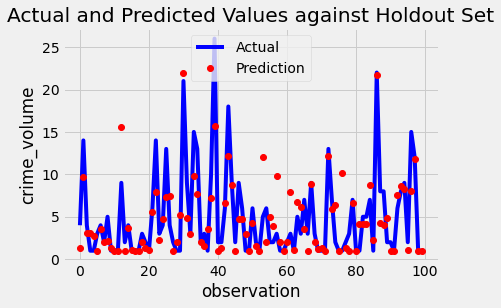

In [82]:
plt.plot(df_holdoutWithPreds['count_cmplnt'].head(100),'b-',label='Actual')
plt.plot(df_holdoutWithPreds['prediction'].head(100),'ro',label='Prediction')
plt.legend()
plt.xlabel('observation'); plt.ylabel('crime_volume'); plt.title('Actual and Predicted Values against Holdout Set')

In [84]:
df_holdoutWithPreds['PredLessActual'] = df_holdoutWithPreds['prediction']-df_holdoutWithPreds['count_cmplnt']

Below, we create a boxplot of the residuals to get a sense of the distribution of how far off our predictions are.  you can see that 50% of the predictions are between -1.28 and .94

In [89]:
df_holdoutWithPreds['PredLessActual'].describe()

count    18962.000000
mean        -0.373841
std          2.696048
min        -36.260000
25%         -1.280000
50%          0.000000
75%          0.940000
max         15.480000
Name: PredLessActual, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2080074e788>,
 'caps': [<matplotlib.lines.Line2D at 0x2080076bdc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2080076b788>],
 'medians': [<matplotlib.lines.Line2D at 0x20800770ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20800770f88>],
 'means': []}

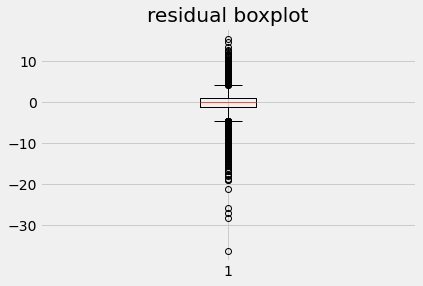

In [85]:
fig1, ax1 = plt.subplots()
ax1.set_title('residual boxplot')
ax1.boxplot(df_holdoutWithPreds['PredLessActual'])

In [88]:
#let's take a look at that prediction that was less than 30 away to see what the actual value was
df_holdoutWithPreds[df_holdoutWithPreds['PredLessActual']<-30]

,PRCP,TMIN,TMAX,x0_Day,x0_Early Morning,x0_Evening,x0_Late Night,x0_Morning,x0_Night,x1_Friday,...,x4_BRONX,x4_BROOKLYN,x4_MANHATTAN,x4_QUEENS,Day,Year,GeoCell,count_cmplnt,prediction,PredLessActual
13903,1.622,0.114212,-0.294761,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,2015.0,76.0,44,7.74,-36.26


Below are the final metrics for the Random Forest Regression including Root Mean Squared Error and Mean Absolute Error

| Model | Test Set RMSE | Holdout Set RMSE | Test Set MAE | Holdout Set MAE |
| :----------- | ----------- |----------- |----------- |----------- |
| Random Forest Regression | 2.77 | 2.72 | 1.75 | 1.74 |